# EMSC3039/PHYS3039: Climate Dynamics
## Week 2 Computational Laboratory - Climate Data Examples

This week we will run some examples of how to read in, process and plot climate data. This will be useful for your major assignment. We will be using data from the NCI THREDDS server (see below for more information). 

Assessment:¶
Once you have worked through the notebook, enter the answer to Question 8 in the Week 2 Lab Wattle Quiz (Lab 1). You do not need to submit the notebook.


### Data come from NCI THREDDS server

This server has a collection of data that you could choose to use for your project. You can click on the server link below and click through the data that is there. It is not the most intuitive server - nor is it completely obvious what the different data is. Please ask the lecturers and demonstrators if you need help navigating the server to find the data you need for your major assignment. 

You can search for specific data or browse the avaiable data in the NCI data catalog

catalog: https://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/home


server: https://dapds00.nci.org.au/thredds/catalog.html
Australian climate model data: https://dapds00.nci.org.au/thredds/catalog/fs38/publications/CMIP6/catalog.html

make sure to use the OPENDAP links otherwise the data will not run from URLs


## Setting up a python environment

First try to run the first two cells of this notebook. This will load the python packages needed for the rest of the code to run and open the data file. If this does not work, you may need to come back here and run one the following set of commands.

Option 1:
Try the following command:
conda create -n emsc3039 -c conda-forge numpy matplotlib xarray netcdf4 h5netcdf notebook
then run source activate emsc3039

Option 2:
Envrionment set up: 

1. Open a terminal window on your computer

2. Create a new environment named `emsc3039_env`\
    code: `conda create -n emsc3039_env xarray numpy matplotlib scipy cartopy`

3. load the environment on your computer\
    code: `source activate emsc3039_env`

4. Add two more packages to the environment using pip install\
    code: `pip install notebook`\
    code: `pip install cartopy`

5. Reload the environment\
    code: `source activate emsc3039_env`

6.  Reload the notebook\
    code: `jupyter notebook`

7.  Try running the cells again

This creates a new python environment where we can change the packages installed without modifying the original base conda environment. It is not clear why installing notebook with pip instead of conda fixes the problem, but it seems to. If this also doesn't work, ask your lecturer/demonstrator for assistance

## 1. Loading Climate Data

First we need to load the python packages needed to open the data and plot it

In [1]:
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs #you may need to run the command pip install cartopy

plt.figure()
plt.rcParams.update({'figure.dpi':100}) #change the default figure size

<Figure size 432x288 with 0 Axes>

We have picked a file containing the variable 'TAS' (surface air temperature) from the Australian Climate Model run over the period 1850-2014.

Now we open the file. You'll note that this is a netcdf ".nc" file. This is the typical data format used in climate science to store data. It includes both the data, links to dimensions such as time, latitude and longitude and metadata that tells us more about what is in the file and how it was created. 

There are a couple of different python libraries to open netcdf files. The code here uses xarray, which builds on numpy and pandas. In particular, xarray keeps track of the names of variables and the labels attached to these (ie, instead of just having the number "23.3", xarray might keep track of this being a temperature, at a particular time, latitude and longitude) More information is available at https://docs.xarray.dev/en/stable/getting-started-guide/why-xarray.html

In [2]:
url='https://dapds00.nci.org.au/thredds/dodsC/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/Amon/tas/gn/latest/tas_Amon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-201412.nc'
ds = xr.open_dataset(url)

Having opened the dataset with xarray, we can query what is in the file

In [3]:
ds

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/48)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           87658.0
    creation_date:                   2020-06-05T04:06:11Z
    ...                              ...
    variant_label:                   r10i1p1f1
    version:                         v20200605
    license:                         CMIP6 model data produced by CSIRO is li...
    cmor_version:                    3.4.0
    tracking_id:                     hdl:21.14100/af78ae5e-f3a6-4e99-8cfe-5f2...
    DODS_EXTRA.Unlimited_Dimension:  time

If we look at the data structure above we can see a few things. 

This data is 3D, gridded and has 3 dimensions. These are time, latitude and longitude. There are 1980 timesteps going from 1850 to 2014 and this is at a monthly resolution. We have 145 latitude points and 192 longitude points which corresponds to about 1.2 degree spacing (180/145) in the latitude direction and 1.8 (360/192) in the longitude direction. 

This dataset contains the variable 'tas', alongside latitude, longitude and time bounds of each datapoint. Looking at tas directly (and clicking "attributes") tells us more about this variable.

TAS is surface air temperature as measured/simulated at 2m above the land or sea surface. In this dataset, it is measured in Kelvin (K). You can find more information about standard data names in the table on wattle. Note the Amon tab is monthly atmosphere variables and the Omon tab is monthly ocean variables. 

In [4]:
ds.tas

<xarray.DataArray 'tas' (time: 1980, lat: 145, lon: 192)>
[55123200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2020-06-05T04:06:10Z altered by CMOR: Treated scalar dime...
    _ChunkSizes:    [  1 145 192]

## 2. Let's look at the Data 

Let's now plot this variable for Canberra. Keep in mind this is not very precise as our model is a 1.2 x 1.8 degree grid. As such we need to interpolate the data from this coarse grid to the point we are interested in. We pick the nearest point to the latitude of Canberra : 149.1310 E and 35.2802 S

Text(0.5, 1.0, 'Canberra Surface Air Temperature')

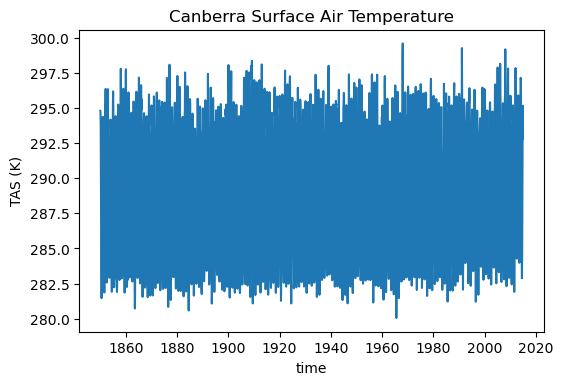

In [5]:
# the following command selects the longitude and latitude of Canberra, 
# interpolates from the coarse model grid to the point we want using 
# 'nearest' location. 
canberra_tas = ds.tas.sel(lon=149.1310, lat=-35.2802, method="nearest")

# This can be plotted with matplotlib.pyplot, as you have likely encountered in previous courses
plt.plot(canberra_tas.time,canberra_tas)
plt.ylabel('TAS (K)')
plt.xlabel('time')
plt.title('Canberra Surface Air Temperature')

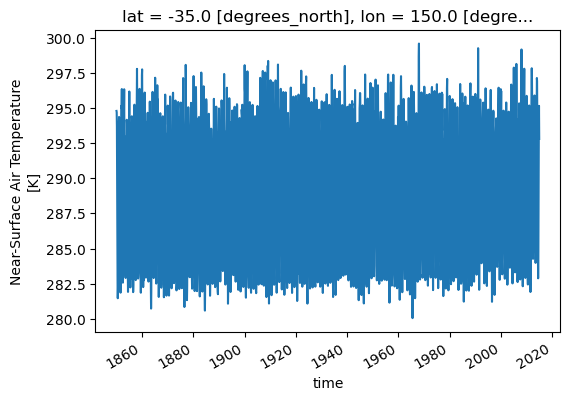

In [6]:
# Alternately, xarray provides a shorthand to plot this data, and will mostly label 
# axes correctly and try to provide a useful title
canberra_tas.plot()

We can next group the data by month - so all Januaries are together, all Feburaries and so on.

In [7]:
ds.tas.groupby("time.month")

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

Next let's take the mean temperature at each month - this is known as climatology. Climatology is the average temperature at each month or day - tells us what a "average" or "normal" time looks like. 

In [8]:
tas_clim = ds.tas.groupby("time.month").mean()
tas_clim

<xarray.DataArray 'tas' (month: 12, lat: 145, lon: 192)>
array([[[244.93558, 244.93558, 244.93558, ..., 244.93558, 244.93558,
         244.93558],
        [246.00145, 245.97162, 245.94138, ..., 246.08989, 246.06117,
         246.03238],
        [246.70651, 246.61302, 246.52026, ..., 246.98866, 246.89555,
         246.80197],
        ...,
        [241.2194 , 241.27704, 241.33316, ..., 241.03645, 241.10268,
         241.15964],
        [240.68303, 240.70807, 240.73222, ..., 240.60663, 240.62997,
         240.65698],
        [239.75099, 239.75099, 239.75099, ..., 239.75099, 239.75099,
         239.75099]],

       [[235.17831, 235.17831, 235.17831, ..., 235.17831, 235.17831,
         235.17831],
        [237.15834, 237.12242, 237.08586, ..., 237.26778, 237.23158,
         237.19579],
        [238.01842, 237.91055, 237.80327, ..., 238.34448, 238.23705,
         238.12819],
...
        [248.17226, 248.23009, 248.2871 , ..., 247.98335, 248.05139,
         248.11057],
        [247.74841, 247.7725 , 247.7949 , ..., 247.67424, 247.69571,
         247.72209],
        [246.84726, 246.84726, 246.84726, ..., 246.84726, 246.84726,
         246.84726]],

       [[245.68677, 245.68677, 245.68677, ..., 245.68677, 245.68677,
         245.68677],
        [246.76009, 246.72945, 246.69827, ..., 246.84958, 246.82043,
         246.79121],
        [247.51729, 247.42332, 247.32942, ..., 247.79912, 247.70605,
         247.6123 ],
        ...,
        [243.34886, 243.40285, 243.45462, ..., 243.1763 , 243.24057,
         243.29327],
        [242.83786, 242.85762, 242.87672, ..., 242.77472, 242.79358,
         242.81636],
        [241.92412, 241.92412, 241.92412, ..., 241.92412, 241.92412,
         241.92412]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 2.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

Now we can plot the climatology in Canberra

Text(0, 0.5, 'tas (K)')

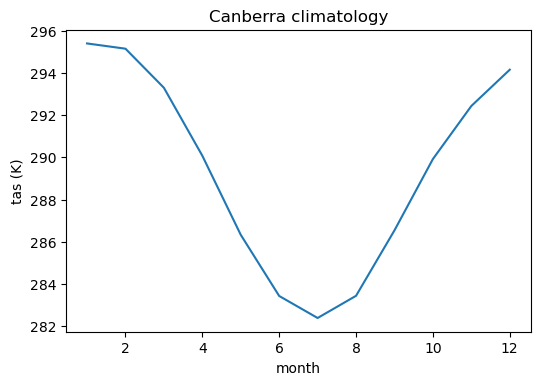

In [9]:
tas_clim.sel(lon=149.1310, lat=-35.2802, method="nearest").plot()
plt.title('Canberra climatology')
plt.ylabel('tas (K)')

#### Question 1

Pick a location in the Northern hemisphere and do it again and see how the climatology looks different! Where did you choose and how does the climatology differ to Canberra?
How does this look on the equator?


Answer here

Now lets make a plot to see how temperature varies in different parts of the globe and look at a zonal mean. A zonal mean averages across longitudes and tells us how a variable looks at each latitude on average. Given our data is 3D we need to choose a dimension to average over to make a 2D plot that we can interpret. This is one way of doing this. 


Text(0.5, 1.0, 'Annual variations in zonal mean temperature')

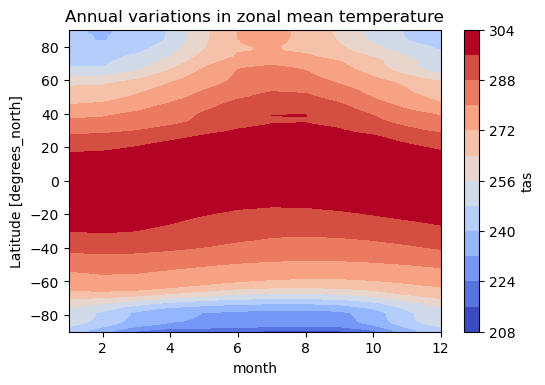

In [10]:
# In this command the .mean(dim='lon') takes the zonal mean - which is the mean over the longitude dimension
# xarray allows us to take the mean over a meaningful name "lon", instead of an axis number like numpy would need
tas_clim.mean(dim="lon").transpose().plot.contourf(levels=12, cmap="coolwarm")
# Equivalent to the following lines of code
# plt.contourf(tas_clim.month,tas_clim.lat,tas_clim.mean(dim="lon").transpose(),levels=12, cmap="coolwarm")
# plt.colorbar(label='tas')

plt.title('Annual variations in zonal mean temperature')

#### Question 2

You can find different colormaps here: https://matplotlib.org/stable/users/explain/colors/colormaps.html

Which colormap would you use for something like rainfall?

Answer here

## 3. Plotting maps


Let's plot maps - we will start with the first time step.

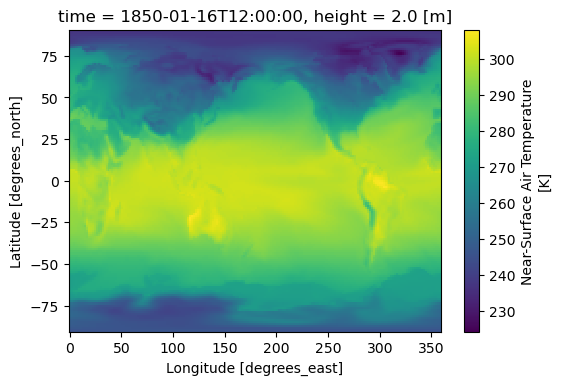

In [11]:
#in this command the .isel(time=0) selects the first time step to plot
# ds['tas'] and ds.tas are equivalent - use whichever you prefer
ds['tas'].isel(time=0).plot()

Let's change the colorbar, add a outline of the land and change the projection.

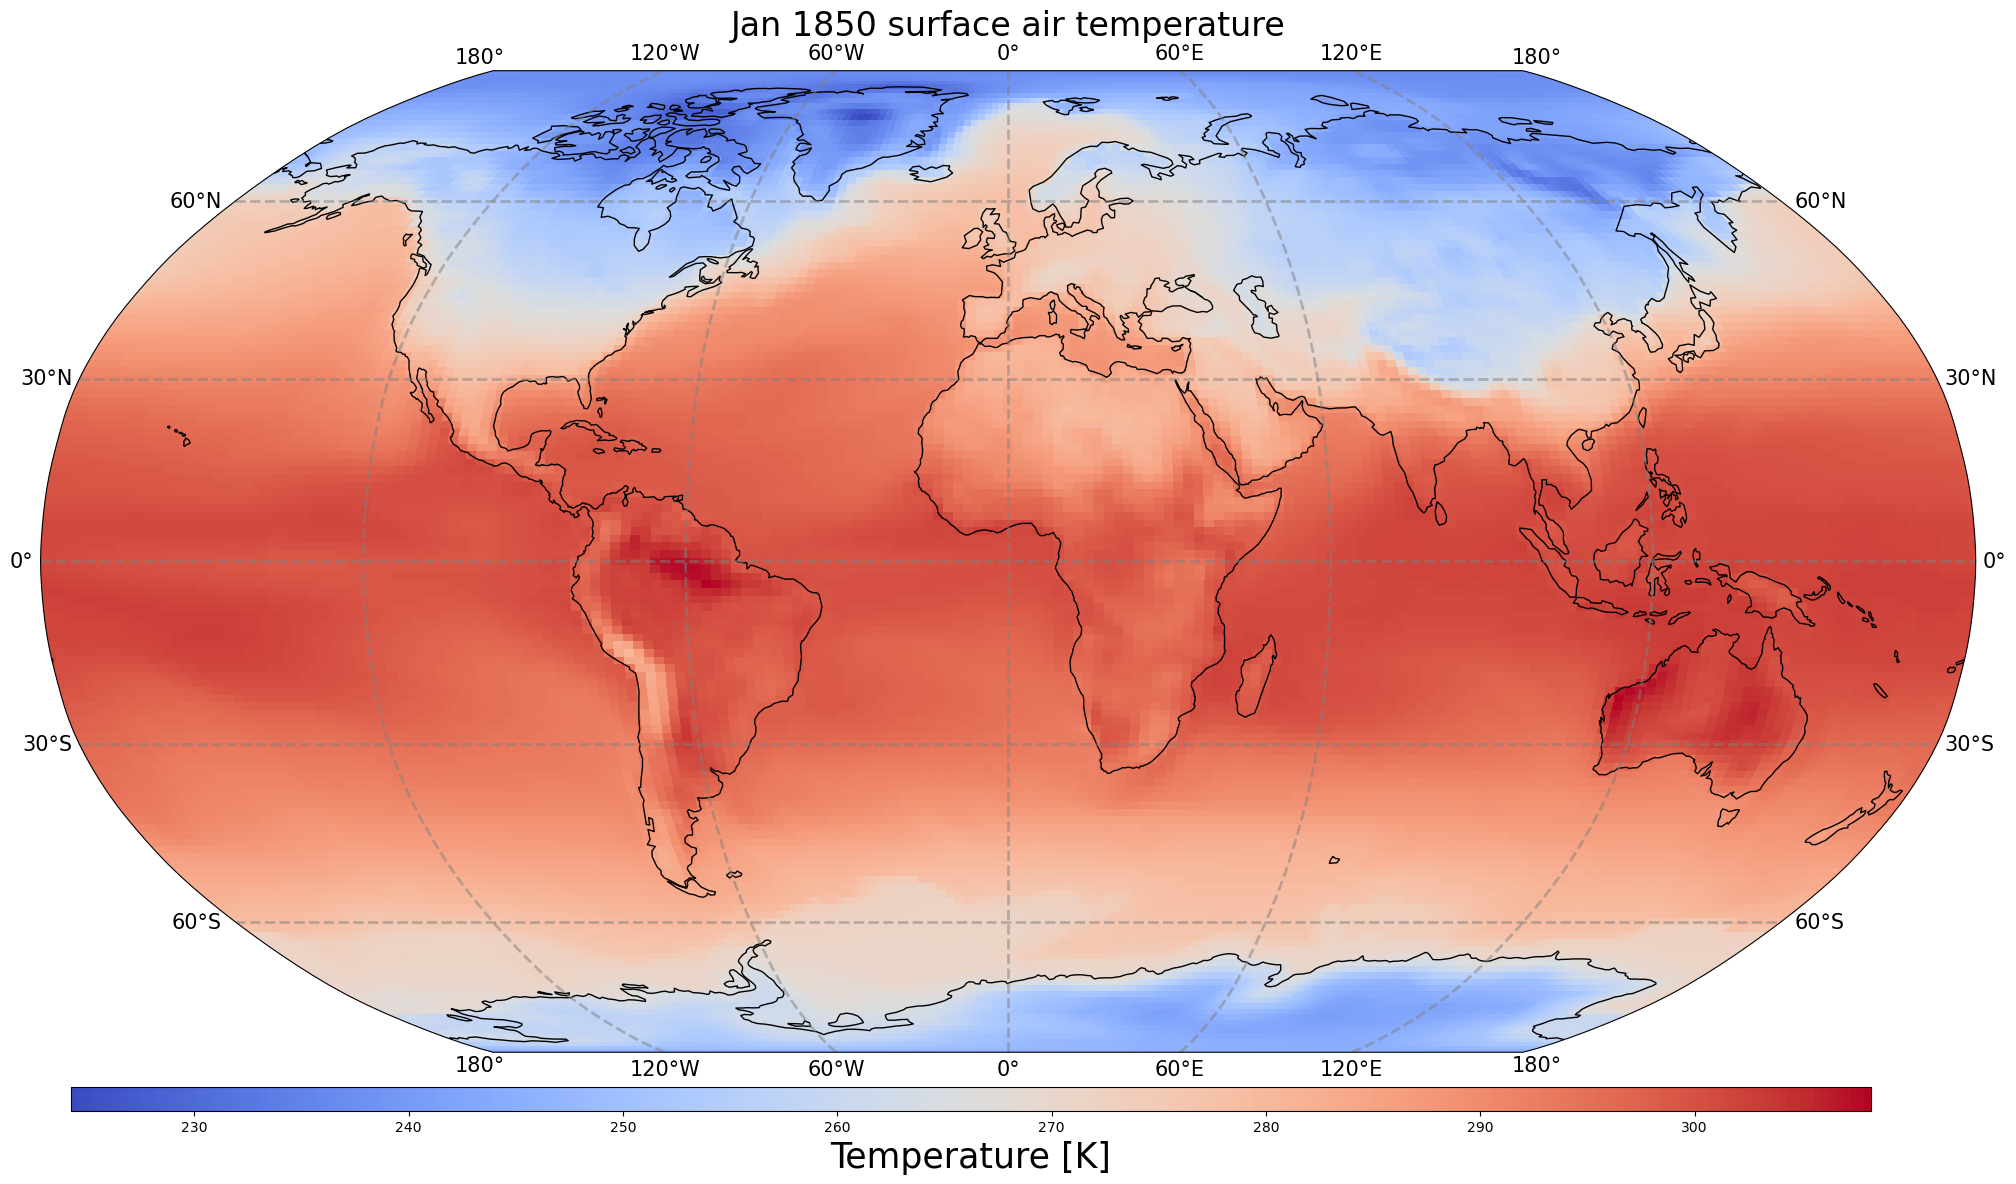

In [12]:
fig = plt.figure(figsize=[30,13])

# Set the projection to use for plotting - Robinson so it is less of a square plot
ax = plt.subplot(1, 1, 1, projection=ccrs.Robinson())

#add outlines of the continents
ax.set_global()
ax.coastlines()

#choose the data we want to plot - here we take time=0 which is January 1850
tas2=ds['tas'].isel(time=0)
lons=ds['lon']
lats=ds['lat']

#lets choose the coolwarm colorbar and plot the data
cplt=ax.pcolormesh(lons, lats, tas2,
                transform=ccrs.PlateCarree(),
                cmap='coolwarm')

#add a title
plt.title('Jan 1850 surface air temperature',fontsize=24)

#add the grid lines for longitude and latitude
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

#add a colorbar
cbar_ax = fig.add_axes([0.2, 0.08, 0.6, 0.018])
cbar = fig.colorbar(cplt, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Temperature [K]',fontsize=25)



## Question 3

Plot a few timesteps and see how the data changes? Can you plot a difference between the first and last timestep? Make sure to use an appropriate colorbar for the difference plot

Answer here

## 4. Calculating means and standard deviations

Now lets plot the mean over the whole time period

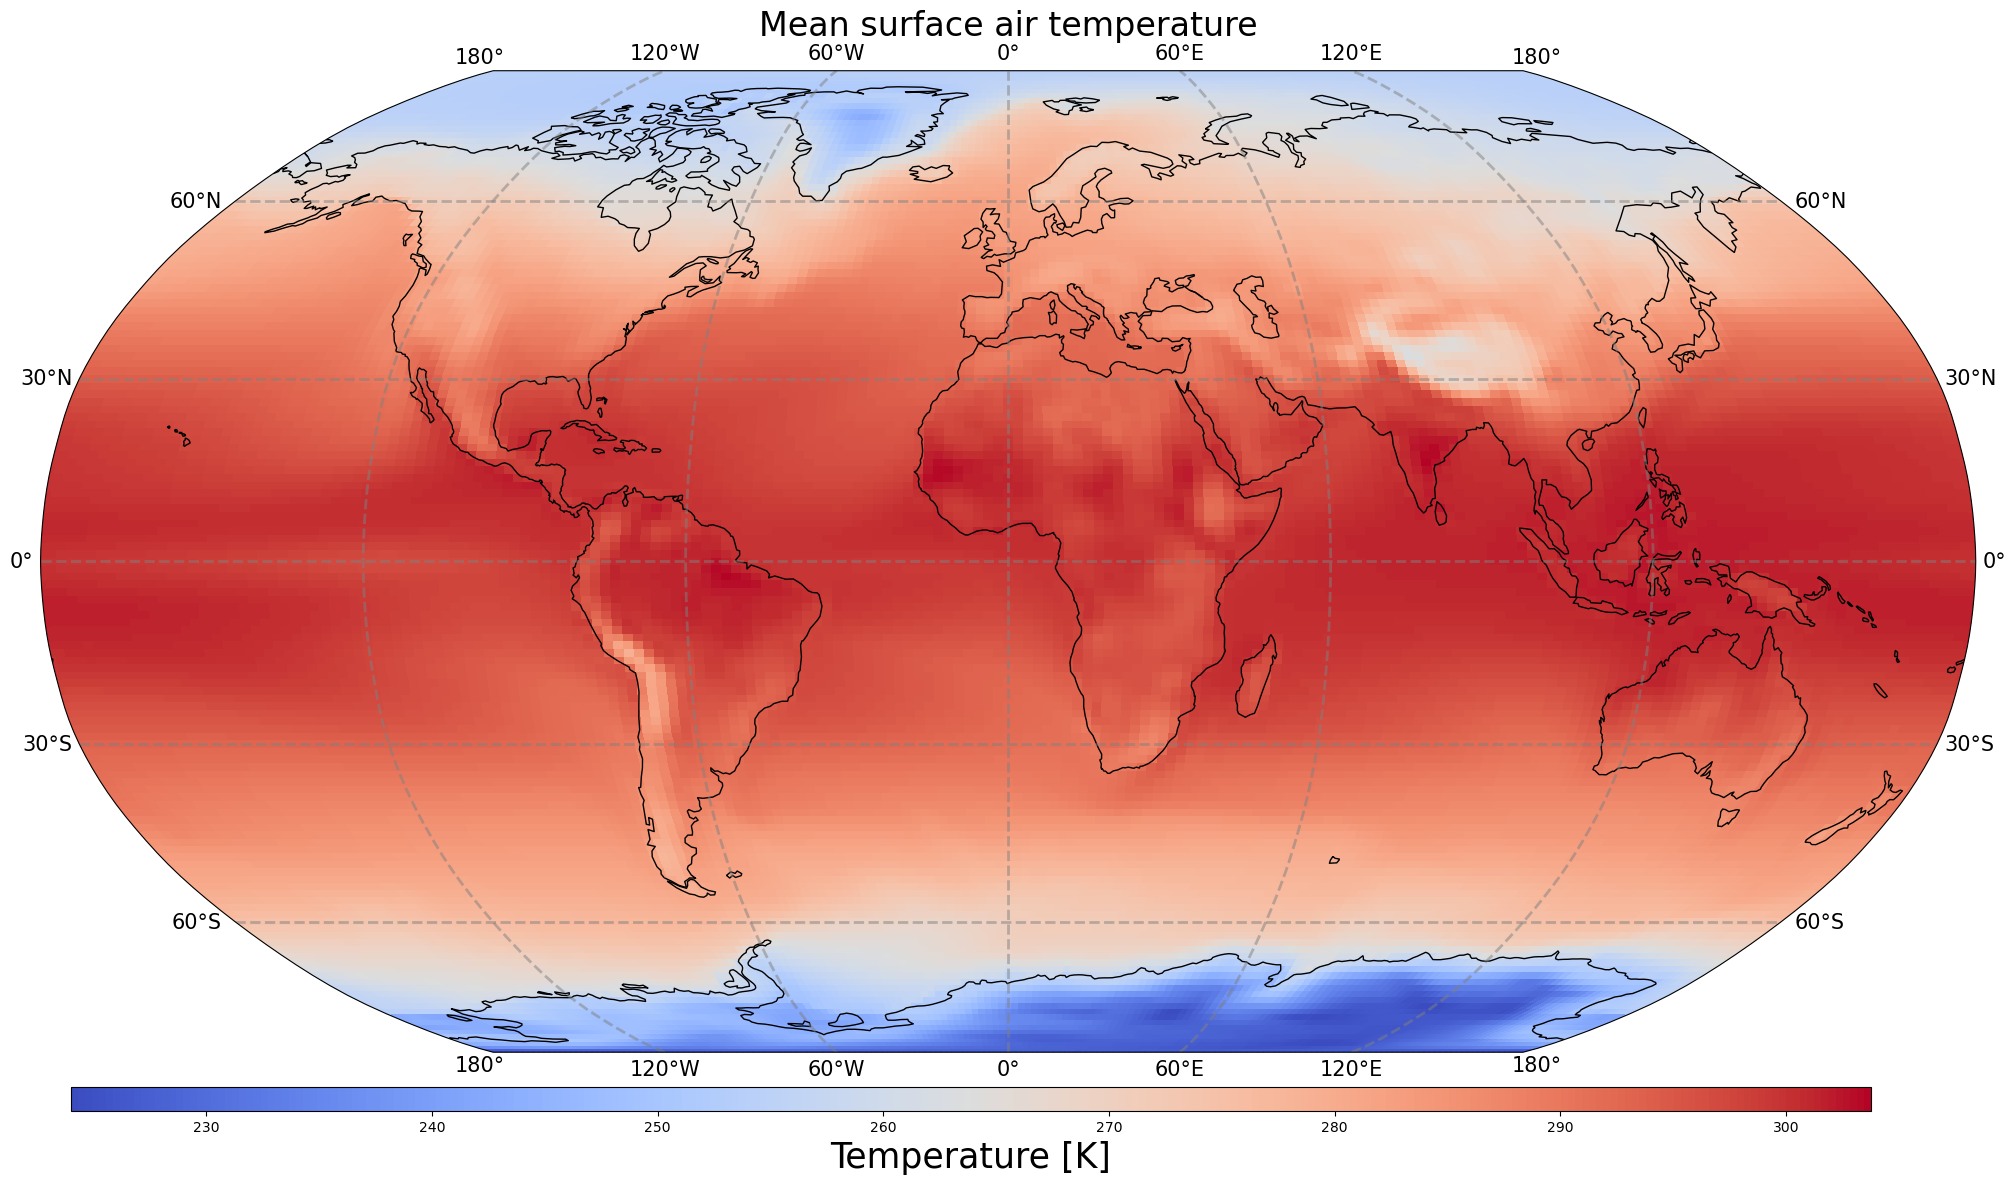

In [13]:
fig = plt.figure(figsize=[30,13])

# Set the projection to use for plotting - Robinson so it is less of a square plot
ax = plt.subplot(1, 1, 1, projection=ccrs.Robinson())

#add outlines of the continents
ax.set_global()
ax.coastlines()

#choose the data we want to plot - here we take an average across the whole dataset
tas2=ds['tas'].mean(dim='time')
lons=ds['lon']
lats=ds['lat']

#lets choose the coolwarm colorbar and plot the data
cplt=ax.pcolormesh(lons, lats, tas2,
                transform=ccrs.PlateCarree(),
                cmap='coolwarm')

#add a title
plt.title('Mean surface air temperature',fontsize=24)

#add the grid lines for longitude and latitude
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

#add a colorbar
cbar_ax = fig.add_axes([0.2, 0.08, 0.6, 0.018])
cbar = fig.colorbar(cplt, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Temperature [K]',fontsize=25)


#### Question 4: Do you expect the first 10 years to be different from the last 10 years?

Answer here

Let's test this!

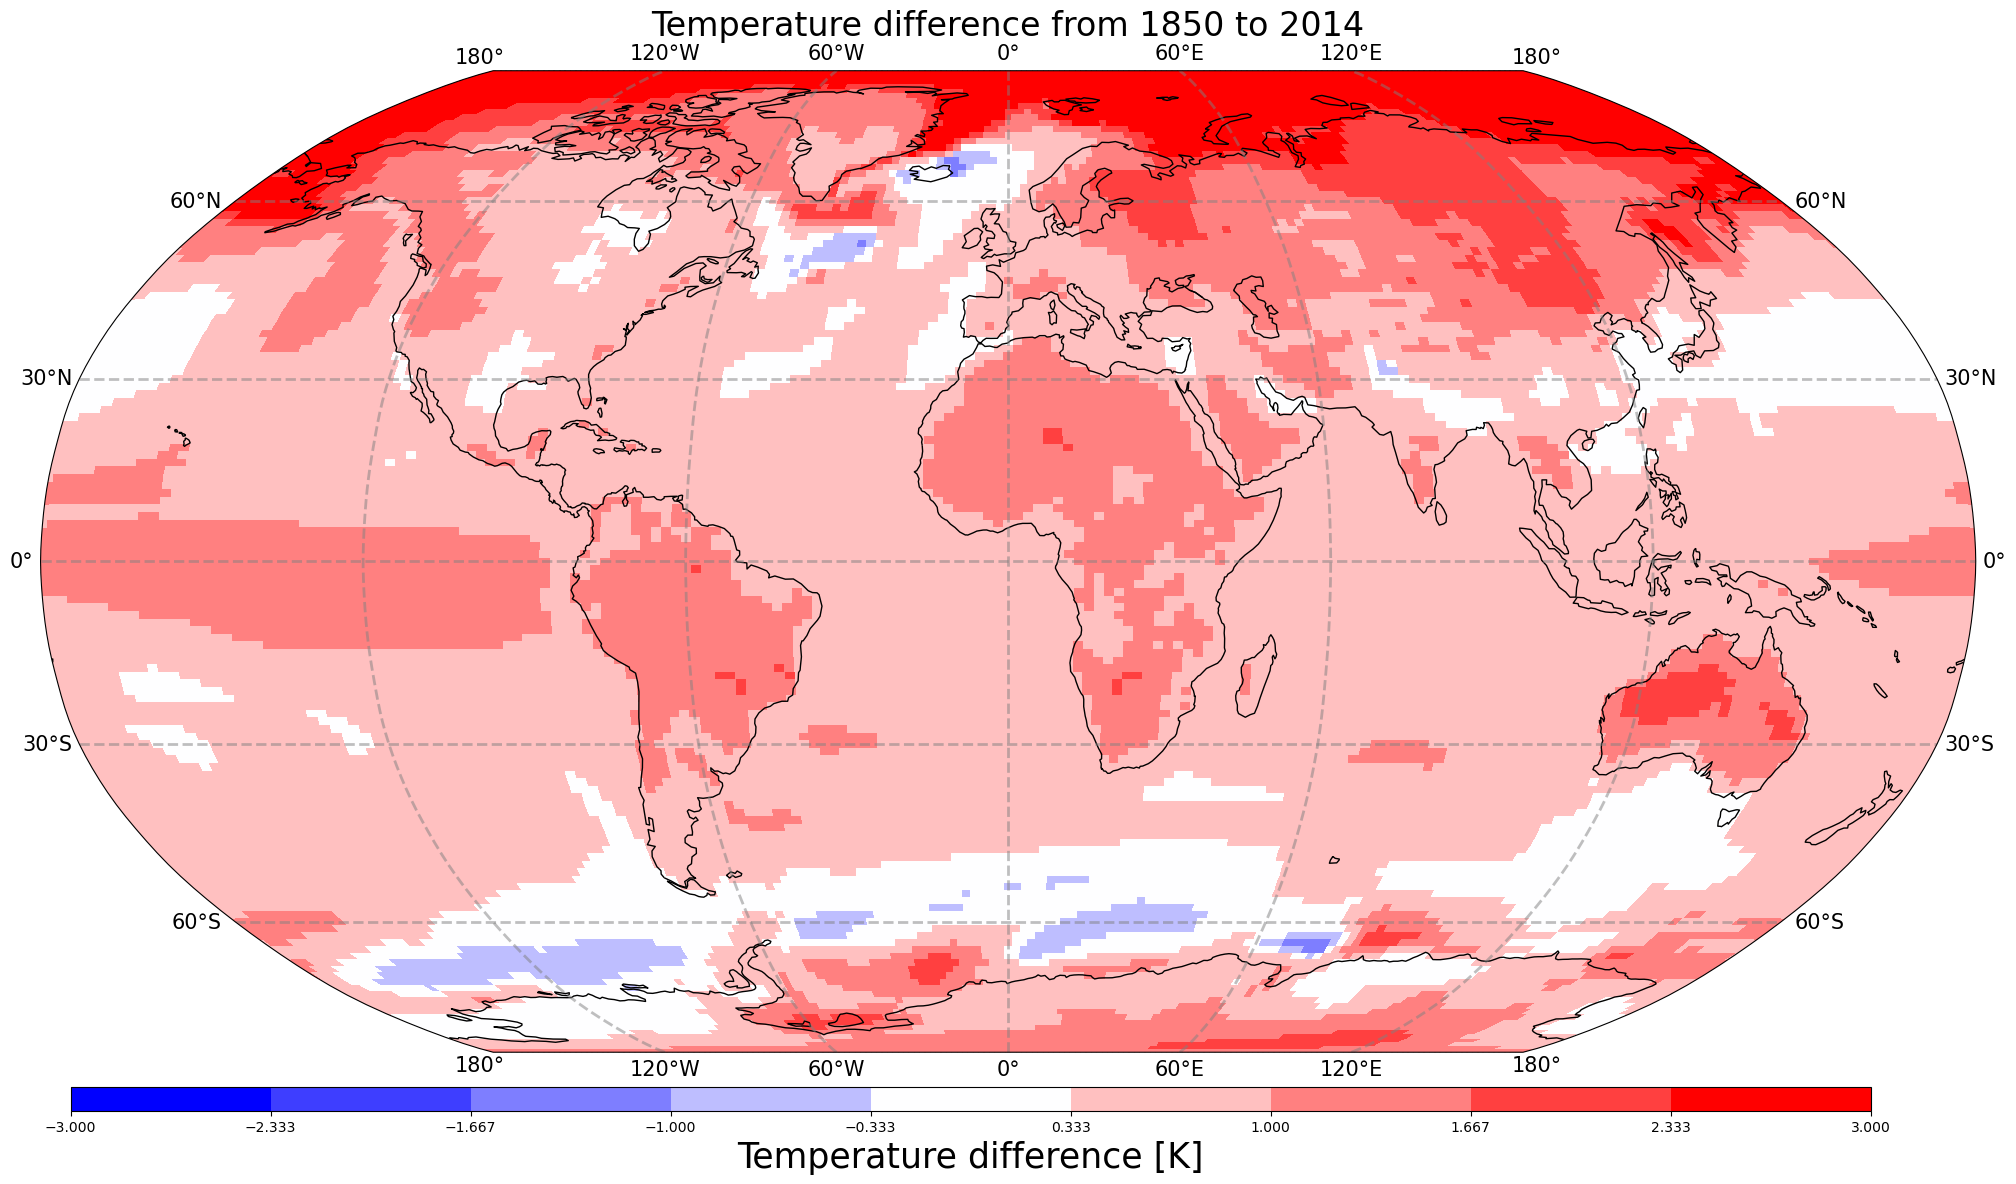

In [14]:
#load another package we need to plot
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


fig = plt.figure(figsize=[30,13])

# Set the projection to use for plotting - Robinson so it is less of a square plot
ax = plt.subplot(1, 1, 1, projection=ccrs.Robinson())

#add outlines of the continents
ax.set_global()
ax.coastlines()

#choose the data we want to plot 
# take the mean of the first 10 years
# the time=slice command here is really valuable to select the years that you want from that dataset
beginning = ds['tas'].sel(time=slice("1850-01-01", "1859-12-31")).mean(dim='time')
# Alternately, you could select just by year for an equivalent result
# beginning = ds['tas'].sel(time=slice("1850", "1859")).mean(dim='time')

# take the mean of the last 10 years
end=ds['tas'].sel(time=slice("2005-01-01", "2014-12-31")).mean(dim='time')

lons=ds['lon']
lats=ds['lat']

#define levels you want to plot
levels = np.linspace(-3,3,10)
cmap = plt.get_cmap('bwr')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

#lets choose the bwr colorbar and plot the data
cplt=ax.pcolormesh(lons, lats, end-beginning,
                transform=ccrs.PlateCarree(),norm=norm,
                cmap='bwr')

#add a title
plt.title('Temperature difference from 1850 to 2014',fontsize=24)

#add the grid lines for longitude and latitude
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

#add a colorbar
cbar_ax = fig.add_axes([0.2, 0.08, 0.6, 0.018])
cbar = fig.colorbar(cplt, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Temperature difference [K]',fontsize=25)


#### Question 5

Did you get the answer you expected? If so why why not?

Now lets look at January. We can use a standard deviation across all the Januaries at each point on the globe to tell us how variable temperature is at each grid point.



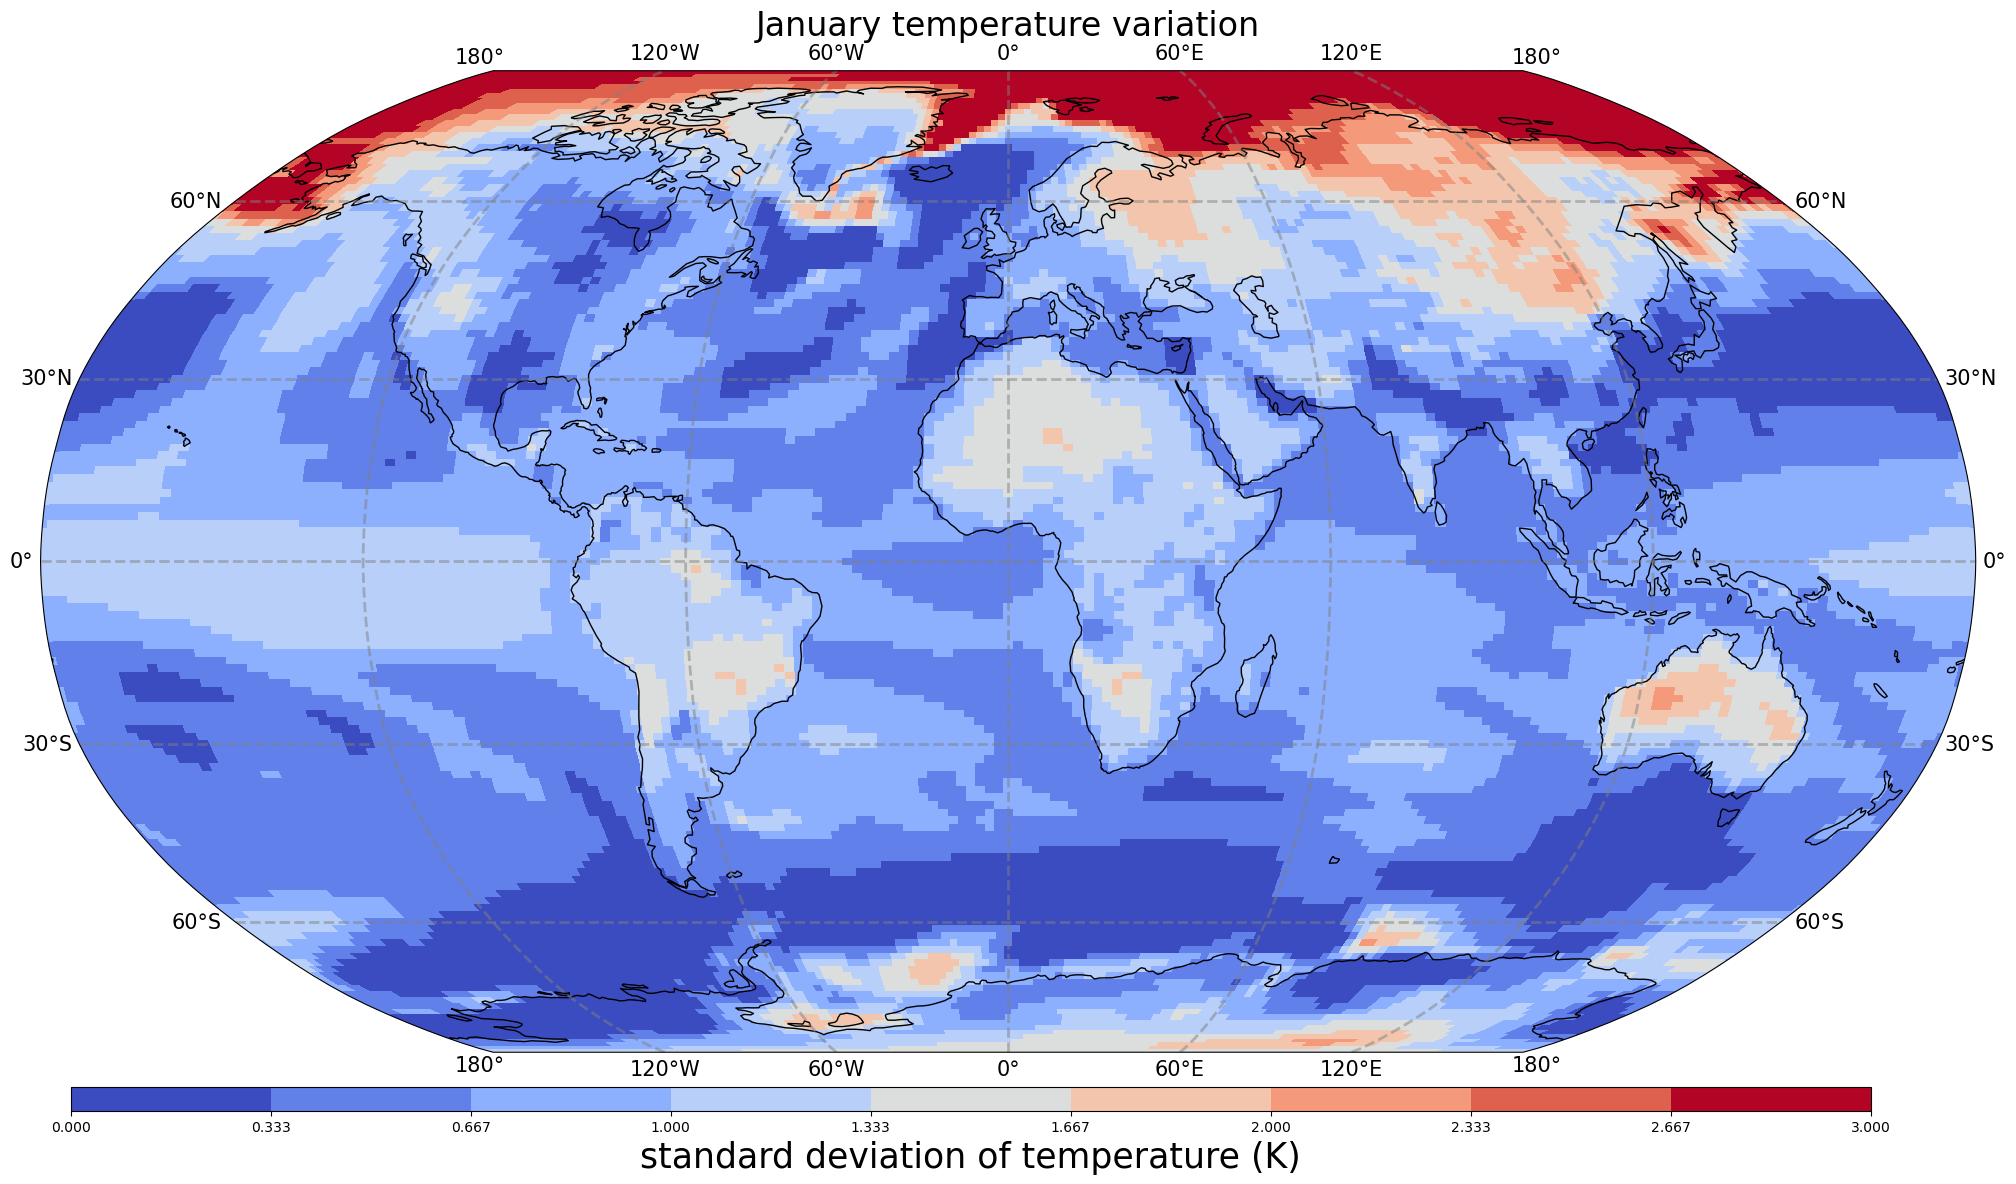

In [15]:
#group by month
monthly_std=ds.tas.groupby("time.month").std()

#take jan standard deviation
jan_std=monthly_std.sel(month=1)

#start the plotting
fig = plt.figure(figsize=[30,13])

# Set the projection to use for plotting - Robinson so it is less of a square plot
ax = plt.subplot(1, 1, 1, projection=ccrs.Robinson())

#add outlines of the continents
ax.set_global()
ax.coastlines()

#choose the data we want to plot 
# take the mean of the first 10 years
# the time=slice command here is really valuable to select the years that you want from that dataset
beginning = ds['tas'].sel(time=slice("1850-01-01", "1859-12-31")).mean(dim='time')
# Alternately, you could select just by year for an equivalent result
# beginning = ds['tas'].sel(time=slice("1850", "1859")).mean(dim='time')

# take the mean of the last 10 years
end=ds['tas'].sel(time=slice("2005-01-01", "2014-12-31")).mean(dim='time')

lons=ds['lon']
lats=ds['lat']

#define levels you want to plot
levels = np.linspace(0,3,10)
cmap = plt.get_cmap('coolwarm')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

#lets choose the bwr colorbar and plot the data
cplt=ax.pcolormesh(lons, lats, end-beginning,
                transform=ccrs.PlateCarree(),norm=norm,
                cmap='coolwarm')

#add a title
plt.title('January temperature variation',fontsize=24)

#add the grid lines for longitude and latitude
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

#add a colorbar
cbar_ax = fig.add_axes([0.2, 0.08, 0.6, 0.018])
cbar = fig.colorbar(cplt, cax=cbar_ax, orientation='horizontal')
cbar.set_label('standard deviation of temperature (K)',fontsize=25)







#### Question 6:

Where is the January standard deviation highest? Why is this? What does this look like in July?

Answer here

## 5. Plotting an ocean transect of temperature, salinity and density

Now we move to the 3D ocean. This is even more complicated to visualise than surface air temeprature as we have added another dimension. This extra dimension is depth. 

When we try to visualise 4D data we need to decide what to plot and which dimensions we are most interested in. Generally in climate science we slice the data in multiple ways to deal with these dimensions. 

In this section we will plot a transect across the ocean bottom for these three variables and then compare these to observed data. This illustrates that data can also have a depth dimension, and some differences between the model data and observations.

In this case we are interested in plotting a transect across one ocean basin (the Atlantic) and interested in how our variables look at different depths in the ocean. 

This data is on a curvilinear grid -- there are two horizontal dimensions, i and j, which don't quite map to longitude and latitude

In [16]:
url='https://dapds00.nci.org.au/thredds/dodsC/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/Omon/so/gn/latest/so_Omon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-185912.nc'
ds_so = xr.open_dataset(url)

ds_so

<xarray.Dataset>
Dimensions:             (time: 120, bnds: 2, lev: 50, j: 300, i: 360,
                         vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 1850-01-16T12:00:00 ... 1859-12...
  * lev                 (lev) float64 5.0 15.0 25.0 ... 5.499e+03 5.831e+03
  * j                   (j) int32 0 1 2 3 4 5 6 ... 293 294 295 296 297 298 299
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
    latitude            (j, i) float64 ...
    longitude           (j, i) float64 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] ...
    lev_bnds            (lev, bnds) float64 ...
    vertices_latitude   (j, i, vertices) float64 ...
    vertices_longitude  (j, i, vertices) float64 ...
    so                  (time, lev, j, i) float32 ...
Attributes: (12/48)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           87658.0
    creation_date:                   2020-06-05T05:00:05Z
    ...                              ...
    variant_label:                   r10i1p1f1
    version:                         v20200605
    license:                         CMIP6 model data produced by CSIRO is li...
    cmor_version:                    3.4.0
    tracking_id:                     hdl:21.14100/38d5fde4-9fda-41c8-8ee9-3a9...
    DODS_EXTRA.Unlimited_Dimension:  time

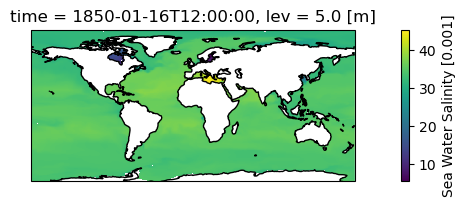

In [17]:
# plot top level and first time step

so=ds_so['so']
plt.figure(figsize=(12, 2))
ax = plt.axes(projection=ccrs.PlateCarree())

# here so is indexed to the 0th point for the first two axes - these are time and depth so we are taking the first timestep and the first depth level
so[0,0,:,:].plot.pcolormesh(ax=ax, x="longitude", y="latitude")
ax.coastlines()


Now we want to plot a transect at 25W (333E) which is a transect in the Atlantic Ocean - we will do so for the first year of the data which is 1850  
'so' is salinity

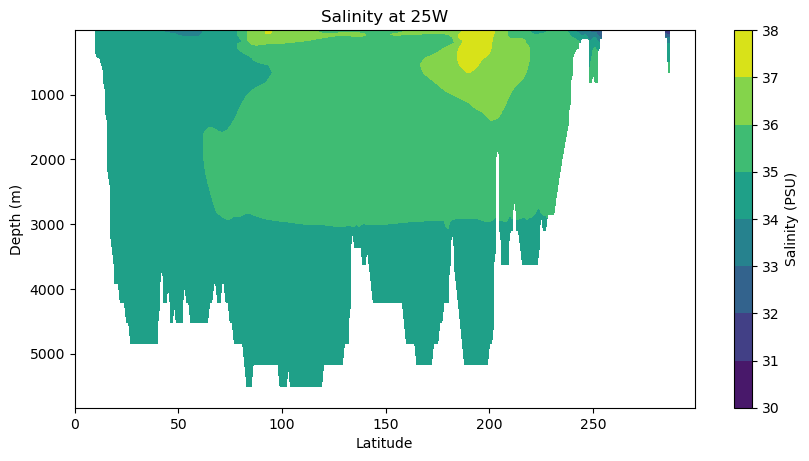

In [18]:
#specify longitude
longitude = 335 

#add a small threshold around this longitude
threshold = 1.0
#Create the mask that finds the j indicesto account for floating point errors that correspond to the longitude 25W - this is because the ocean grid is not simple lat/lon
mask_lon = (ds_so['longitude'] >= longitude - threshold) & (ds_so['longitude'] <= longitude + threshold)
ds_transect = ds_so['so'].sel(time=slice("1850-01-01", "1850-12-31")).mean(dim='time')
ds_transect = ds_transect.where(mask_lon) # apply the mask to the data to extract all the points matching the required longitude

ds_transect_avg = ds_transect.mean(dim='i') # Average over the i dimension to get a 2D (depth vs latitude) array. We have to do this as the ocean grid is not just longitude and latitude

plt.figure(figsize=[10, 5])
plt.contourf(ds_transect_avg['j'], ds_transect_avg['lev'], ds_transect_avg)
plt.colorbar(label='Salinity (PSU)')
plt.gca().invert_yaxis()  # Invert the y-axis so depth increases downwards
plt.xlabel('Latitude')
plt.ylabel('Depth (m)')
plt.title('Salinity at 25W')
plt.show()

Now we do the same for temperature (thetao) and oxygen (o2)

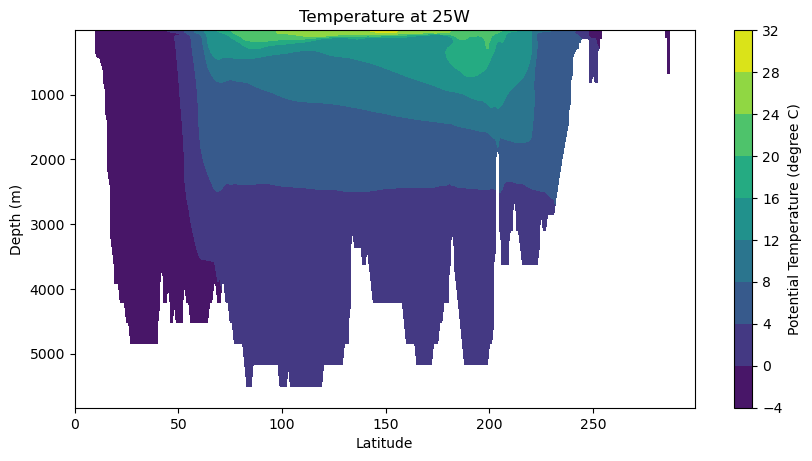

In [19]:
url='https://dapds00.nci.org.au/thredds/dodsC/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/Omon/thetao/gn/latest/thetao_Omon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-185912.nc'
ds_thetao = xr.open_dataset(url)

#specify longitude
longitude = 335 

#add a small threshold around this longitude
threshold = 1.0
#Create the mask that finds the j indices that correspond to the longitude 25W - this is because the ocean grid is not simple lat/lon
mask_lon = (ds_thetao['longitude'] >= (longitude - threshold)) & (ds_thetao['longitude'] <= (longitude + threshold))
ds_transect2 = ds_thetao['thetao'].sel(time=slice("1850-01-01", "1850-12-31")).mean(dim='time').where(mask_lon) # apply the mask to the data to extract all the points matching the required longitude

ds_transect_avg2 = ds_transect2.mean(dim='i') # Average over the i dimension to get a 2D (depth vs latitude) array

plt.figure(figsize=[10, 5])
plt.contourf(ds_transect_avg2['j'], ds_transect_avg2['lev'], ds_transect_avg2)
plt.colorbar(label='Potential Temperature (degree C)')
plt.gca().invert_yaxis()  # Invert the y-axis so depth increases downwards
plt.xlabel('Latitude')
plt.ylabel('Depth (m)')
plt.title('Temperature at 25W')
plt.show()

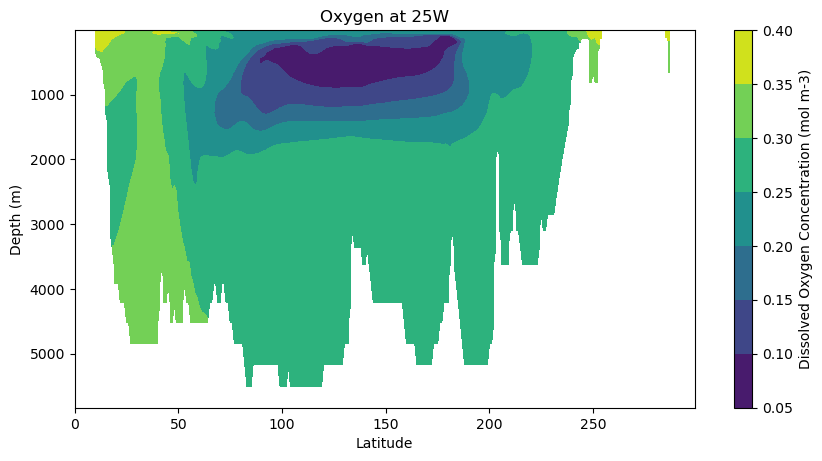

In [20]:
url='https://dapds00.nci.org.au/thredds/dodsC/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/Omon/o2/gn/latest/o2_Omon_ACCESS-ESM1-5_historical_r10i1p1f1_gn_185001-185912.nc'
ds_o2 = xr.open_dataset(url)

#specify longitude
longitude = 335 

#add a small threshold around this longitude
threshold = 1.0
#Create the mask that finds the j indices that correspond to the longitude 25W - this is because the ocean grid is not simple lat/lon
mask_lon = (ds_o2['longitude'] >= (longitude - threshold)) & (ds_o2['longitude'] <= (longitude + threshold))
ds_transect3 = ds_o2['o2'].sel(time=slice("1850-01-01", "1850-12-31")).mean(dim='time').where(mask_lon) # apply the mask to the data to extract all the points matching the required longitude

ds_transect_avg3 = ds_transect3.mean(dim='i') # Average over the i dimension to get a 2D (depth vs latitude) array

plt.figure(figsize=[10, 5])
plt.contourf(ds_transect_avg3['j'], ds_transect_avg3['lev'], ds_transect_avg3)
plt.colorbar(label='Dissolved Oxygen Concentration (mol m-3)')
plt.gca().invert_yaxis()  # Invert the y-axis so depth increases downwards
plt.xlabel('Latitude')
plt.ylabel('Depth (m)')
plt.title('Oxygen at 25W')
plt.show()

## Question 7 

Look at the observational data below and see how it compares qualitatatively with your plots from the climate model. Do they look similar? Why / why not?

Observational Data for the 25W transect: http://sam.ucsd.edu/whp_atlas/atlantic/a16/sections/printatlas/printatlas.htm



Answer here

## Question 8

Is it saltier at the surface or at depth in the Atlantic? "Answer in wattle" - surface or depth
Is that what you expected?
